In [12]:
pip install --upgrade numpy pandas

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.8/12.8 MB 8.4 MB/s eta 0:00:02
   --------- ------------------------------ 3.1/12.8 MB 7.4 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/12.8 MB 7.3 MB/s eta 0:00:02
   --------------------- ------------------ 6.8/12.8 MB 7.9 MB/s eta 0:00:01
   --------------------------- ------------ 8.9/12.8 MB 8.1 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.8 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.8 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.0 MB 10.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.0 MB 9.8 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/11.0 MB 8.8 MB/s eta 0:00:01
   ------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
scipy 1.14.1 requires numpy<2.3,>=1.23.5, but you have numpy 2.3.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.3 which is incompatible.


In [3]:
pip install pandas

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

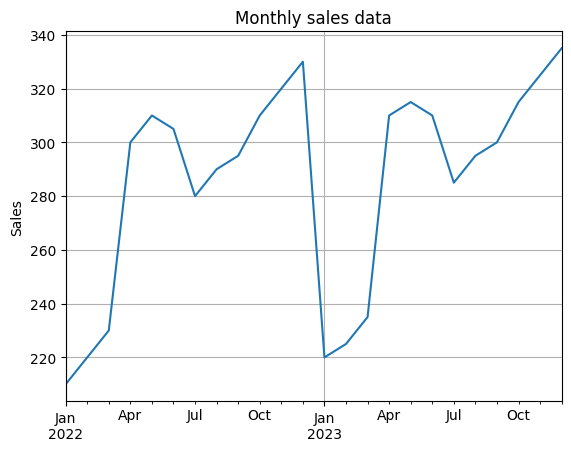

In [5]:
sales=[210, 220, 230, 300, 310, 305, 280, 290, 295, 310, 320, 330, 
220, 225, 235, 310, 315, 310, 285, 295, 300, 315, 325, 335]
dates=pd.date_range(start='2022-01-01',periods=len(sales),freq='MS')
df=pd.Series(sales,index=dates)
df.plot(title="Monthly sales data")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


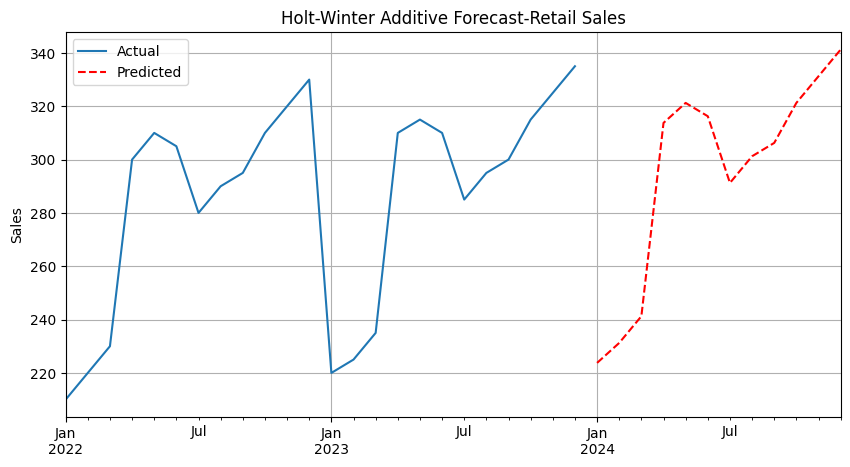

In [17]:
model=ExponentialSmoothing(df,trend='add',seasonal='add',seasonal_periods=12)
fit=model.fit()

forecast=fit.forecast(12)
plt.figure(figsize=(10,5))
df.plot(label="Actual")
forecast.plot(label="Predicted",color="red",linestyle='--')
plt.title('Holt-Winter Additive Forecast-Retail Sales') 
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

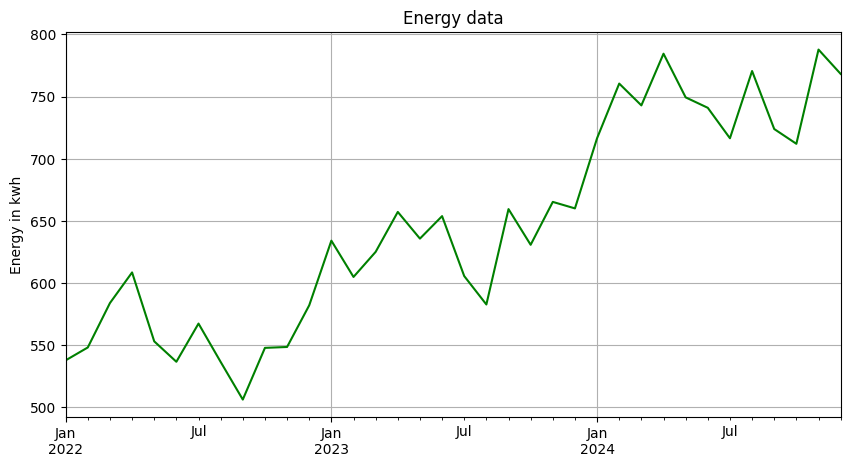

In [25]:
#random generation
#demand=(base+trend+seasonality+noise)
import numpy as np
np.random.seed(42)
months=pd.date_range(start='2022-01-01',periods=36,freq='MS')
demand=(500+np.linspace(0,300,36)+50*np.sin(2*np.pi*months.month/12)+np.random.normal(0,26,36))
df=pd.Series(demand,index=months)
plt.figure(figsize=(10,5))
df.plot(title="Energy data",color="green")
plt.ylabel("Energy in kwh")
plt.grid(True)
plt.show()

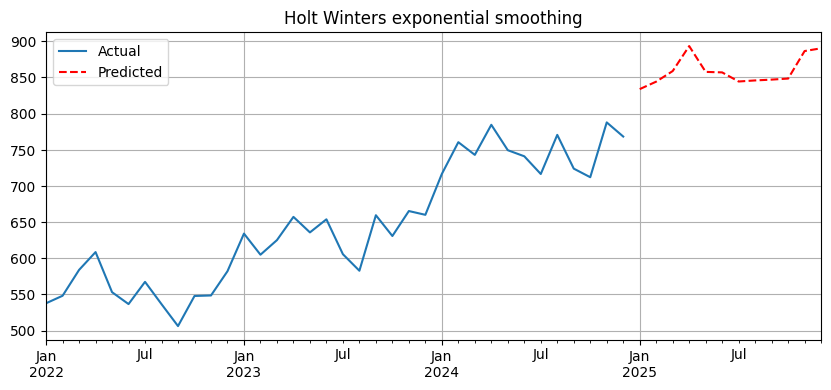

In [33]:
model=ExponentialSmoothing(df,trend='add',seasonal='add',seasonal_periods=12)
fit=model.fit()
forecast=fit.forecast(12)
plt.figure(figsize=(10,4))
df.plot(label="Actual")
forecast.plot(label="Predicted",color="red",linestyle="--")
plt.title("Holt Winters exponential smoothing")
plt.grid(True)
plt.legend()
plt.show()

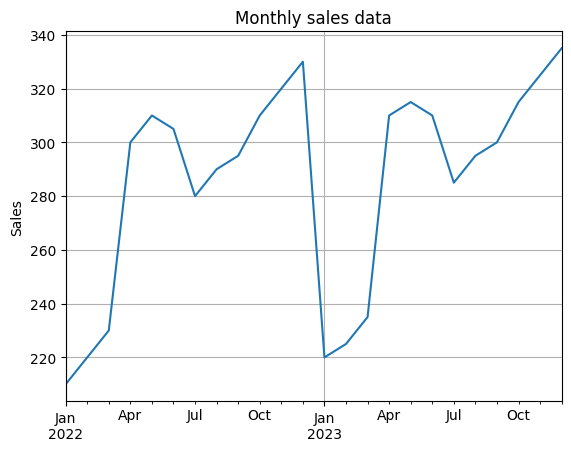

In [34]:
#multiplicative
sales=[210, 220, 230, 300, 310, 305, 280, 290, 295, 310, 320, 330, 
220, 225, 235, 310, 315, 310, 285, 295, 300, 315, 325, 335]
dates=pd.date_range(start='2022-01-01',periods=len(sales),freq='MS')
df=pd.Series(sales,index=dates)
df.plot(title="Actual Sales data")
plt.title("Monthly sales data")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

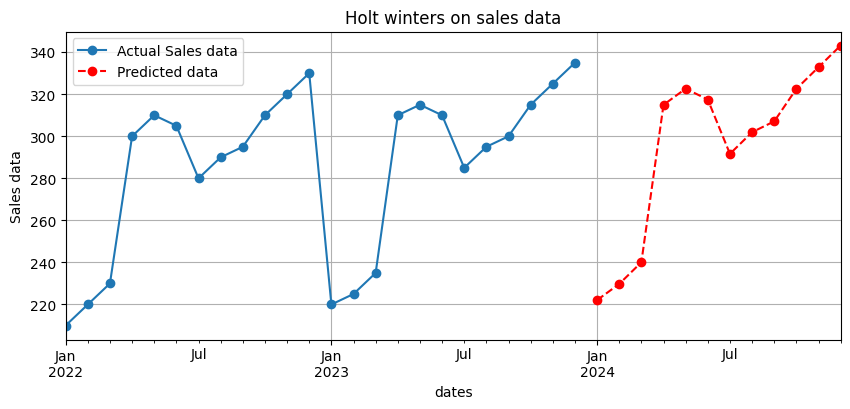

In [44]:
model=ExponentialSmoothing(df,trend='add',seasonal='mul',seasonal_periods=12)
fit=model.fit()
forecast=fit.forecast(12)
plt.figure(figsize=(10,4))
df.plot(label="Actual Sales data",marker='o')
forecast.plot(label="Predicted data",color='red',linestyle='--',marker='o')
plt.ylabel("Sales data")
plt.xlabel("dates")
plt.title("Holt winters on sales data")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
print("Forecast for the next 12 months for sales")
print(forecast.round(0).astype(int))

Forecast for the next 12 months for sales
2024-01-01    222
2024-02-01    230
2024-03-01    240
2024-04-01    315
2024-05-01    323
2024-06-01    317
2024-07-01    292
2024-08-01    302
2024-09-01    307
2024-10-01    323
2024-11-01    333
2024-12-01    343
Freq: MS, dtype: int64


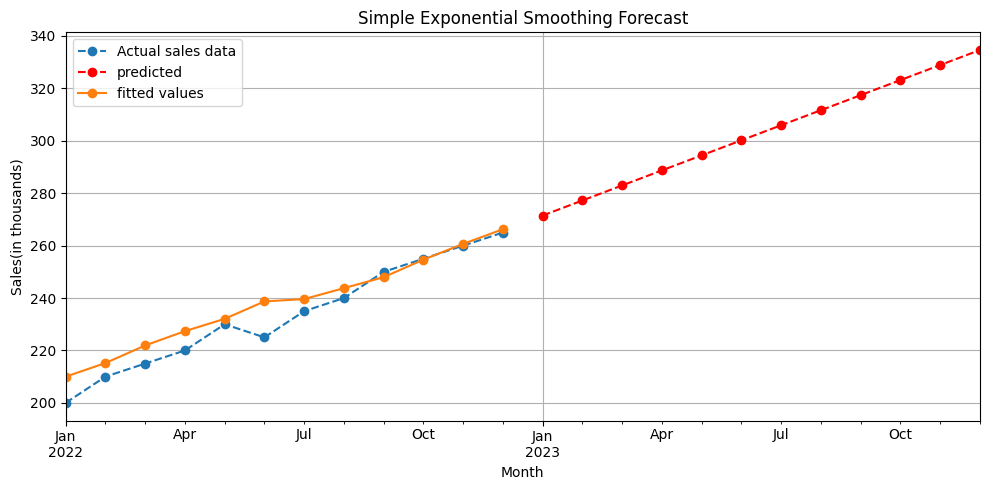

The forecasted values are:
2023-01-01    271
2023-02-01    277
2023-03-01    282
2023-04-01    288
2023-05-01    294
2023-06-01    300
2023-07-01    305
2023-08-01    311
2023-09-01    317
2023-10-01    323
2023-11-01    328
2023-12-01    334
Freq: MS, dtype: int64


In [63]:
#simple exponential smoothing

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt

sales_data = [200,210,215,220,230,225,235,240,250,255,260,265]
dates=pd.date_range(start='2022-01-01',periods=12,freq='MS')
df=pd.Series(sales_data,index=dates)
plt.figure(figsize=(10,5))
df.plot(label="Actual sales data",marker='o',linestyle='--')
plt.ylabel("Sales")
plt.grid(True)
model=Holt(df)
fit=model.fit(smoothing_level=0.4,smoothing_trend=0.2,optimized=False)
forecast=fit.forecast(12)
forecast.plot(label="predicted",marker='o',color='red',linestyle='--')
fit.fittedvalues.plot(label='fitted values',marker='o')
plt.title('Simple Exponential Smoothing Forecast') 
plt.xlabel('Month') 
plt.ylabel('Sales(in thousands)') 
plt.legend() 
plt.grid() 
plt.tight_layout() 
plt.show()

print('The forecasted values are:')
print(forecast.round(2).astype(int))

            Consumption
Date                   
2022-01-01          320
2022-01-02          315
2022-01-03          325
2022-01-04          330
2022-01-05          328
Consumption    0
dtype: int64
Next 6 months forecast:
2022-01-11    347.12
2022-01-12    349.96
2022-01-13    352.79
2022-01-14    355.62
2022-01-15    358.45
2022-01-16    361.28
Freq: D, dtype: float64


C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


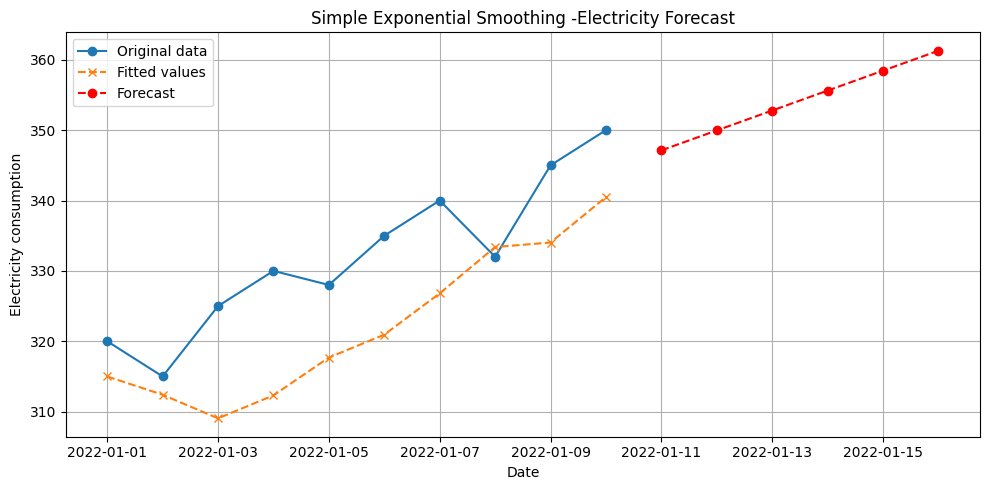

ADF Statistic: -2.0190865619798424
p-value: 0.2782675166061518
The series is not stationary. Need to apply differencing...


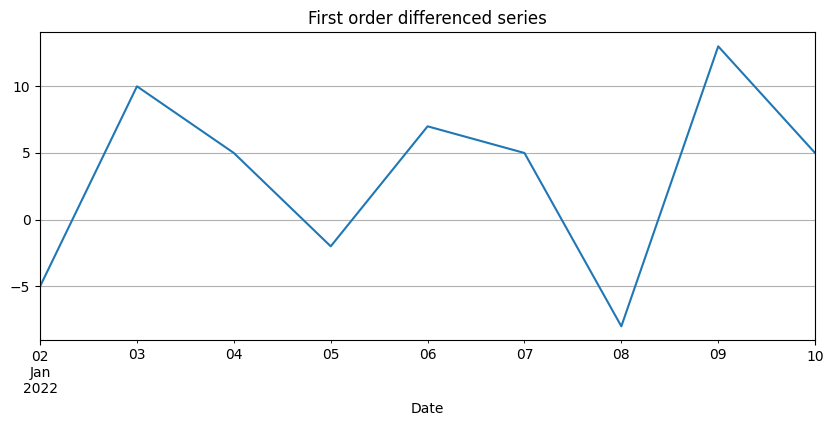

ADF Statistic after differencing: -6.779358018082682
p-value after differencing: 2.522527412724736e-09
The differenced series is now stationary..


In [99]:
#pd.read_csv

df=pd.read_csv('consumption_data.csv',parse_dates=['Date'],index_col='Date')
print(df.head())

print(df.isnull().sum())

df.dropna()
series=df['Consumption']
model1=Holt(series)

fit=model1.fit(smoothing_level=0.4,smoothing_trend=0.2,optimized=False)
forecast=fit.forecast(6)
print("Next 6 months forecast:") 
print(forecast.round(2))

plt.figure(figsize=(10,5)) 
plt.plot(df.index,df['Consumption'], label='Original data',marker='o') 
plt.plot(fit.fittedvalues , label='Fitted values',linestyle='--',marker='x') 
plt.plot(forecast , label='Forecast',linestyle='--',marker='o',color='red') 
plt.title('Simple Exponential Smoothing -Electricity Forecast') 
plt.xlabel('Date') 
plt.ylabel('Electricity consumption') 
plt.legend() 
plt.grid() 
plt.tight_layout() 
plt.show()

#adfuller test

from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Consumption'])
print("ADF Statistic:",result[0])
print('p-value:',result[1]) 
if result[1] <0.05:
    print('The series is stationary') 
else: 
    print('The series is not stationary. Need to apply differencing...') 
    df_diff = df['Consumption'].diff().dropna() 
df_diff.plot(figsize=(10,4),title='First order differenced series')
plt.grid(True)
plt.show()

#adfuller on differenced series
result_diff = adfuller(df_diff) 
print('ADF Statistic after differencing:',result_diff[0]) 
print('p-value after differencing:',result_diff[1]) 
if result_diff[1] < 0.05: 
    print('The differenced series is now stationary..')

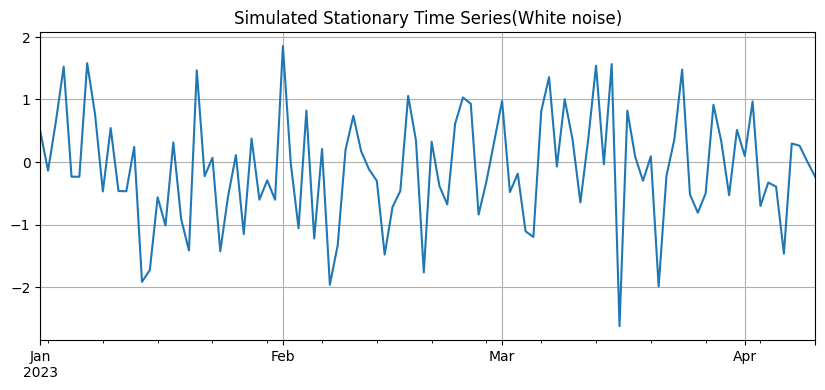

In [93]:
#random seed to simulate white noise
np.random.seed(42)
data1=np.random.normal(loc=0,scale=1,size=100)
dates=pd.date_range(start='2023-01-01',periods=100,freq='D')
df=pd.Series(data,index=dates)
plt.figure(figsize=(10,4))
df.plot(title='Simulated Stationary Time Series(White noise)') 
plt.grid() 
plt.show() 
